In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import root_scalar


# Find membrane voltage using root finding in the GHK Flux equation

1. **GHK equation statement**:

$\phi_{s} = P_{s} z_{s}^2\frac{V_m F^2}{RT} \frac{[S]_i - [S]_0 \exp(\frac{-z_sV_mF}{RT})}{1 - \exp(\frac{-z_sV_mF}{RT})}$


2. **We have the number flux density**:

$J_{s} = -\frac{\phi_{s}}{z_sF}$

**As our flux is defined as the rate of increase of the internal membrane concentration, we need a minus sign!**

3. **Solve the equation numerically**

We know J and $[S]_i$ and $[S]_0$ and have extracted $P_s$ from the initial period of decay. All other parameters are constants. Therefore we can use this to find the membrane voltage by using a numerical root solver



In [2]:
F = 96485 #Cmol-1
z_s = 1
R = 8.31 #JK^-1mol^-1
T = 298 #K
C0 = 1 #mM or Molm^-3

In [3]:
# define flux equation for root solving

def flux_root(V,J,deltaC,P_s):
    
    F = 96485 #Cmol-1
    z_s = 1
    R = 8.31 #JK^-1mol^-1
    T = 298 #K
    C0 = 1 #mM or Molm^-3
    r = 10e-6
    prefactor = -1*P_s*z_s*(V*F)/(3*r*R*T)
    
    fraction = (C0-deltaC - C0*np.exp((-z_s*V*F)/(R*T)))/(1-np.exp((-z_s*V*F)/(R*T)))
    
    return prefactor*fraction - J

def flux(V,deltaC,P_s):
    
    
    F = 96485 #Cmol-1
    z_s = 1
    R = 8.31 #JK^-1mol^-1
    
    T = 298 #K
    C0 = 1 #mM or Molm^-3
    prefactor = -1*P_s*z_s*(V*F)/(3*r*R*T)
    
    fraction = (C0-deltaC - C0*np.exp((-z_s*V*F)/(R*T)))/(1-np.exp((-z_s*V*F)/(R*T)))
    
    return prefactor*fraction 
    
def dJdV(J,deltaC,V,P):
    
    F = 96485 #Cmol-1
    z_s = 1
    R = 8.31 #JK^-1mol^-1
    T = 298 #K
    C0 = 1 #mM or Molm^-3
    r = 10e-6
    
    alpha = z_s*F/(R*T)
    
    x1 = J/V
    print('x1: ',x1)
    x2 = (P*alpha**2/(3*r))*V*np.exp(alpha*V)*deltaC/(np.exp(alpha*V)-1)**2
    print('x2:',x2)
    
    return x1 + x2

def GHKrhs(C)

In [4]:
# load data

Js = pd.read_csv('20210427_OmpF_mean_J.csv')
deltaCs = pd.read_csv('20210427_OmpF_mean_deltaC.csv')
stdJs = pd.read_csv('20210427_OmpF_std_J.csv')
stddCs = pd.read_csv('20210427_OmpF_std_deltaC.csv')
# Ps = pd.read_csv('')

#clip away from initial period


Js = Js.iloc[:,1:]

deltaCs = deltaCs.iloc[:,1:]

stdJs = stdJs.iloc[:,1:]
stddCs = stddCs.iloc[:,1:]

In [9]:
print(Js,deltaCs,stdJs,stddCs)

                J
0    3.864051e-09
1    3.845966e-09
2    3.809841e-09
3    3.773804e-09
4    3.737862e-09
5    3.702022e-09
6    4.045560e-09
7    4.667887e-09
8    5.194750e-09
9    5.720082e-09
10   6.208405e-09
11   6.605832e-09
12   6.927691e-09
13   7.118059e-09
14   7.102174e-09
15   6.951624e-09
16   6.727432e-09
17   6.431307e-09
18   6.049570e-09
19   5.656023e-09
20   5.292795e-09
21   4.926908e-09
22   4.553535e-09
23   4.183779e-09
24   3.866146e-09
25   3.585223e-09
26   3.367824e-09
27   3.221925e-09
28   3.070528e-09
29   2.916804e-09
..            ...
262  5.113621e-10
263  5.109855e-10
264  5.023989e-10
265  4.884348e-10
266  4.876570e-10
267  4.916919e-10
268  4.893517e-10
269  4.914417e-10
270  4.954601e-10
271  4.916491e-10
272  4.895754e-10
273  4.910142e-10
274  4.924583e-10
275  4.939077e-10
276  4.953626e-10
277  4.968228e-10
278  4.982884e-10
279  4.997594e-10
280  5.012358e-10
281  5.027177e-10
282  5.042051e-10
283  5.056980e-10
284  6.748234e-10
285  7.489

In [44]:
deltaCs['dC'].to_numpy().dtype

dtype('float64')

NameError: name 'deltaCs2' is not defined

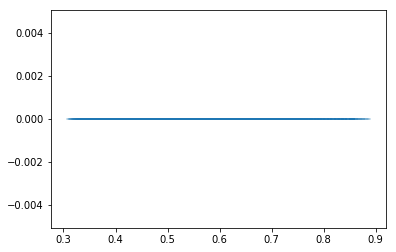

In [5]:
# plot mean data
fig, ax = plt.subplots(1,1)

start = 6
ax.scatter(deltaCs['dC'].to_numpy()[start:],Js['J'].to_numpy()[start:],marker = '+',s = 4)
l = ax.errorbar(deltaCs['dC'].to_numpy()[start:],Js['J'].to_numpy()[start:],stdJs['dJ'].to_numpy()[start:],stddCs['ddC'].to_numpy()[start:],alpha = 0.25)
l[0].remove()
ax.scatter(deltaCs2['dC'].to_numpy()[start:],Js2['J'].to_numpy()[start:],marker = '+',s = 4)
l = ax.errorbar(deltaCs2['dC'].to_numpy()[start:],Js2['J'].to_numpy()[start:],stdJs2['dJ'].to_numpy()[start:],stddCs2['ddC'].to_numpy()[start:],alpha = 0.25)
l[0].remove()
ax.set_ylim([-1e-9,9e-9])
ax.set_xlim([0,1])
xticks = [0,0.5,1]
yticks = [0,4e-9,8e-9]

xlabel = '$\Delta C$ [mM]'
ylabel = '$J [molm^2s^{-1}]$'

y_sciformat = 1e-9

set_plot_params(ax,xticks,yticks,xlabel,ylabel,y_sciformat=y_sciformat)


x_bar = np.arange(0.65,0.9,0.001)
y1_bar = P1*x_bar
y2_bar = P2*x_bar

ax.plot(x_bar,y1_bar,c='C0')
ax.plot(x_bar,y2_bar,c = 'C1')

In [6]:
# find mean membrane voltage

V_mem= []
V_mem_up = []
V_mem_low = []
V_mem_meta= []
dV = []
#find permeability
start = 7
limit = 13

J = Js[Js.columns[0]].to_numpy()
deltaC = deltaCs[deltaCs.columns[0]].to_numpy()
stdJ = stdJs[stdJs.columns[0]].to_numpy()
stddC = stddCs[stddCs.columns[0]].to_numpy()

P1 = (J[limit]-J[start])/(deltaC[limit]-deltaC[start])
print(P1)



for i,J_i in enumerate(J[start:]):
    dC = deltaC[start:][i]
    dJ = stdJ[start:][i]
    ddC = stddC[start:][i]
    
    argsm = (J_i,dC,P1)
    argsu = (J_i,dC+ddC,P1)
    argsl = (J_i,dC-ddC,P1)
    
    V = root_scalar(flux_root,argsm,method = 'brentq',bracket = [-1,10])
    
    V_mem.append(V.root)
    V_mem_meta.append(V)
    V = root_scalar(flux_root,argsu,method = 'brentq',bracket = [-1,10])
    V_mem_up.append(V.root)
    V = root_scalar(flux_root,argsl,method = 'brentq',bracket = [-1,10])
    V_mem_low.append(V.root)

#     inv_err = dJdV(J_i,dC,V.root,P)
    
#     dV.append(dJ/inv_err)
    

1.4061104370253112e-08


In [7]:
def set_plot_params(ax,xticks,yticks,
                    xlabel,ylabel,x_sciformat = 1,y_sciformat = 1):
    plt.tick_params(direction = 'in',top = True,right = True,left = True,bottom = True, length = 6)


    if x_sciformat != 1 or y_sciformat != 1:
        xticklabels = np.array(xticks)/x_sciformat
        yticklabels = np.array(yticks)/y_sciformat
        
    else:
        xticklabels = xticks
        yticklabels = yticks
        
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels,fontsize = 16)

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels,fontsize = 16)

    ax.set_xlabel(xlabel,fontsize = 19)
    ax.set_ylabel(ylabel,fontsize = 19)


In [10]:
%matplotlib qt
figV,axV = plt.subplots(1,1)

dt = 9/60
t_V = dt*np.arange(len(V_mem))

axV.scatter(t_V,V_mem,marker  = '+',s = 8,c ='C0')
axV.fill_between(t_V,V_mem_low,V_mem_up, color = 'C0',alpha = 0.25)
xticks = [0,25,50]
yticks = [0,0.03,0.06]
y_sciformat = 1e-3

set_plot_params(axV,xticks,yticks,xlabel='T [mins]',ylabel = '$V_{mem}$ [mV]',y_sciformat=y_sciformat)
# axV.set_ylim([-2e-3,32e-3])


In [34]:
print(V_mem_low[0],V_mem[0],V_mem_up[0])

0.020409798141221715 0.02040973280331938 0.020409667465438864


In [11]:
# load data

Js2 = pd.read_csv('20210421_OmpF_mean_J.csv')
deltaCs2 = pd.read_csv('20210421_OmpF_mean_deltaC.csv')
stdJs2 = pd.read_csv('20210421_OmpF_std_J.csv')

stddCs2 = pd.read_csv('20210421_OmpF_std_deltaC.csv')
# Ps = pd.read_csv('')

#clip away from initial period


Js2 = Js2.iloc[:,1:]

deltaCs2 = deltaCs2.iloc[:,1:]

stdJs2 = stdJs2.iloc[:,1:]
stddCs2 = stddCs2.iloc[:,1:]


In [21]:
fig, ax = plt.subplots(1,1)

ax.scatter(deltaCs2,Js2)
l = ax.errorbar(deltaCs2['dC'].to_numpy(),Js2['J'].to_numpy(),yerr=np.abs(stdJs2['dJ'].to_numpy().astype(float)),xerr = stddCs2['ddC'].to_numpy())
l[0].remove()
ax.set_ylim([-1e-9,11e-9])

(-1e-09, 1.1e-08)

In [27]:
len(stdJs2),len(Js2)


(683, 683)

In [12]:
# find mean membrane voltage

V_mem2= []
V_mem_meta2= []
V_mem_up2 = []
V_mem_low2 = []
V_mem_meta2= []
#find permeability
start = 25
limit = 28

J2 = Js2[Js2.columns[0]].to_numpy()
deltaC2 = deltaCs2[deltaCs2.columns[0]].to_numpy()
stdJ2 = stdJs2[stdJs2.columns[0]].to_numpy()
stddC2 = stddCs2[stddCs2.columns[0]].to_numpy()
P2 = (J2[limit]-J2[start])/(deltaC2[limit]-deltaC2[start])
print(P2)



for i,J_i in enumerate(J2[start:]):
    dC = deltaC2[0:][i]
    dJ = stdJ2[0:][i]
    ddC = stddC2[0:][i]   
    
    
    argsm = (J_i,dC,P2)
    argsu = (J_i,dC+ddC,P2)
    argsl = (J_i,dC-ddC,P2)   
    V = root_scalar(flux_root,argsm,method = 'brentq',bracket = [-1,10])
    
    V_mem2.append(V.root)
    V_mem_meta2.append(V)
    V = root_scalar(flux_root,argsu,method = 'brentq',bracket = [-1,10])
    V_mem_up2.append(V.root)
    V = root_scalar(flux_root,argsl,method = 'brentq',bracket = [-1,10])
    V_mem_low2.append(V.root)


2.381550659455393e-09


In [13]:
# %matplotlib qt
figV2,axV2 = plt.subplots(1,1)

dt2 = 5/60
t_V2 = dt2*np.arange(len(V_mem2))

axV.scatter(t_V2,V_mem2,marker  = '+',s = 8,c ='C1')
axV.fill_between(t_V2,V_mem_low2,V_mem_up2, color = 'C1',alpha = 0.25)
xticks2 = [0,25,50]
yticks2 = [0,0.030,0.06]
y_sciformat2 = 1e-3

set_plot_params(axV2,xticks2,yticks2,xlabel='T [mins]',ylabel = '$V_{mem}$ [mV]',y_sciformat=y_sciformat2)
# axV.set_ylim([-2e-3,32e-3])?

In [73]:
axV.set_xlim([-1,51])
axV.set_ylim([-0.001,0.061])

(-0.001, 0.061)

In [21]:

c = 0.5e-2 #F/m^2


C_guv = c*(4*np.pi*(1e-5)**2)

vol = ((4/3)*np.pi*(1e-5)**3)
Q = F*0.1*vol

V = Q/C_guv

In [22]:
V

6.432333333333334

In [35]:
J_pred = {}
for key in V_mem.keys():
    V_1 = V_mem[key]
    P = Ps[key].iloc[0]
    deltaC = deltaCs[key]
    J_pred[key] = []
    for i,V in enumerate(V_1):

        deltaC_i = deltaC.iloc[i]

        J_pred[key].append(flux(V,deltaC_i,P))


In [36]:
%matplotlib qt
dt = 9/60


threshold = 2

fig, axs = plt.subplots(1,3)

for key in Js.keys():
    
    scaled_V = (F/(R*T))*np.array(V_mem[key])
    if len(scaled_V[scaled_V> 2]) > 1:
        V_mem.pop(key)
        continue
        
    axs[0].scatter(dt*np.arange(0,scaled_V.shape[0]),J_pred[key])
    axs[1].scatter(deltaCs[key],Js[key])
    
    
    axs[2].scatter(dt*np.arange(0,scaled_V.shape[0]),scaled_V)

axs[1].set_ylim([-0.1e-8,2e-8])
axs[0].set_ylim([-0.1e-8,2e-8])

axs[1].set_xlim([0,1.2])

(0, 1.2)

# Find mean Flux and mean Membrane voltage

In [37]:
V_memdf = pd.DataFrame(V_mem)
    

In [58]:
Mean_V = (F/(R*T))*V_memdf.mean(axis = 1)
upper_V = (F/(R*T))*(V_memdf.mean(axis = 1)+V_memdf.std(axis = 1))
lower_V = (F/(R*T))*(V_memdf.mean(axis = 1)-V_memdf.std(axis = 1))
Mean_J = Js[V_memdf.columns].mean(axis = 1)
upper_J = Js[V_memdf.columns].mean(axis = 1)+Js[V_memdf.columns].std(axis = 1)
lower_J = Js[V_memdf.columns].mean(axis = 1)-Js[V_memdf.columns].std(axis = 1)

In [54]:
# plot mean membrane voltage

fig, ax = plt.subplots(1,1)

t = dt*np.arange(Mean_V.shape[0]) #mins

ax.scatter(t,Mean_V, marker = '+',s = 8)
ax.fill_between(t,lower_V,upper_V,alpha = 0.4)
# ax[1].scatter(dt*np.arange(Mean_V.shape[0]),Mean_J,marker = '+',s = 8)

# ax[1].set_ylim(-0.1e-8,1.1e-8)

plt.tick_params(direction = 'in',top = True,right = True,left = True,bottom = True, length = 6)

y_ticks = [0,0.4,0.8]
x_ticks = [0,20,40]

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks,fontsize = 15)

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks,fontsize = 15)

ax.set_xlabel( 'T [mins]',fontsize = 18)
ax.set_ylabel('V [(RT/F)V]',fontsize = 18)

Text(0, 0.5, 'V [(RT/F)V]')

In [64]:
def set_plot_params(ax,xticks,yticks,
                    xlabel,ylabel,x_sciformat = 1,y_sciformat = 1):
    plt.tick_params(direction = 'in',top = True,right = True,left = True,bottom = True, length = 6)


    if x_sciformat != 1 or y_sciformat != 1:
        xticklabels = np.array(xticks)/x_sciformat
        yticklabels = np.array(yticks)/y_sciformat
        
    else:
        xticklabels = xticks
        yticklabels = yticks
        
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels,fontsize = 15)

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels,fontsize = 15)

    ax.set_xlabel(xlabel,fontsize = 18)
    ax.set_ylabel(ylabel,fontsize = 18)



In [67]:
# make flux plot

# plot mean membrane voltage

fig, ax = plt.subplots(1,1)

t = dt*np.arange(Mean_V.shape[0]) #mins

ax.scatter(t,Mean_J, marker = '+',s = 8)
ax.fill_between(t,lower_J,upper_J,alpha = 0.4)

yticks = [0,0.5e-8,1e-8]
set_plot_params(ax,x_ticks,yticks,xlabel='Time [mins]',ylabel='Flux [$10^8 molm^{-2}s^{-1}$]',y_sciformat=1e-8)

ax.set_ylim(-0.1e-8,1.1e-8)

/home/marcus/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(-1e-09, 1.1e-08)

# Mean Flux analysis

In [4]:
meanFluxdata = pd.read_csv('20210420_OmpF_MeanFluxvsdeltaC.csv')

In [6]:
V_mem = []
V_mem_meta = []
for i,J in enumerate(meanFluxdata['J']):

#         print(key)
        deltaC = meanFluxdata['deltaC'].iloc[i]
    
#         P = Ps[key].iloc[0]*0.8
        args = (J,deltaC,1)

        
        V = root_scalar(flux_root,args,method='brentq',bracket = [1e-18,10])
        print(V)
        V_mem.append(V.root)
        V_mem_meta.append(V)
        
        guess = V.root

      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 0.010430622684080985
      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 0.010510796129225827
      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 0.010922980915410213
      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 0.011121797113588069
      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 0.011312048727339995
      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 0.01158185008765816
      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 0.01194194236359765
      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
        

/home/marcus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


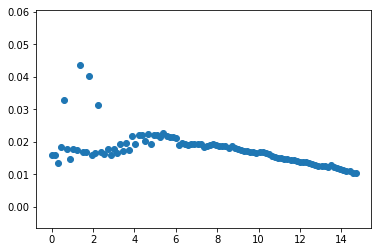

In [9]:
fig, ax = plt.subplots(1,1)

ax.scatter((9/60)*np.arange(len(V_mem)),V_mem[::-1])